In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

file_path = "hwe_results.hwe"


def manhattan_plot(hwe_file, threshold=None, save_fig=False, fig_name=None):
    """
    Function to make a Manhattan plot of HWE p-values.
    
    Parameters:
    hwe_file: Path to the file containing HWE p-values
    threshold: Threshold p-value for horizontal line (default None)
    save_fig: Boolean indicating whether to save the figure (default False)
    fig_name: Name of the saved file
    
    Returns:
    None
    """
    data = pd.read_csv(hwe_file, delim_whitespace=True, header=0)
    
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # Map chromosomes to colors
    chromosome_colors = {1: 'red', 2: 'blue', 3: 'green', 4: 'purple', 5: 'orange',
                         6: 'brown', 7: 'pink', 8: 'gray', 9: 'olive', 10: 'cyan',
                         11: 'magenta', 12: 'yellow', 13: 'black', 14: 'navy', 15: 'violet',
                         16: 'darkred', 17: 'teal', 18: 'turquoise', 19: 'indigo', 20: 'slateblue',
                         21: 'deeppink', 22: 'limegreen'}
    
    # Plot the p-values
    for chromosome, color in chromosome_colors.items():
        chrom_data = data[data['CHR'] == chromosome]
        ax.scatter(chrom_data.index, -np.log10(chrom_data['P']), color=color, label=str(chromosome))
    
    # Add a threshold line, if specified
    if threshold is not None:
        ax.axhline(-np.log10(threshold), color='black', linestyle='dashed')
    
    # Set the x-axis labels
    chrom_starts = [data[data['CHR'] == chrom].index[0] for chrom in chromosome_colors.keys()]
    ax.set_xticks(chrom_starts)
    ax.set_xticklabels(chromosome_colors.keys())
    
    # Add labels and formatting
    ax.set_xlabel("Chromosome")
    ax.set_ylabel("-log10(p-value)")
    ax.set_title("Manhattan Plot")
    # ax.legend()
    
    if save_fig:
        fig.savefig(fig_name)
    else:
        plt.show()


/cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/scipy-stack/2022a/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


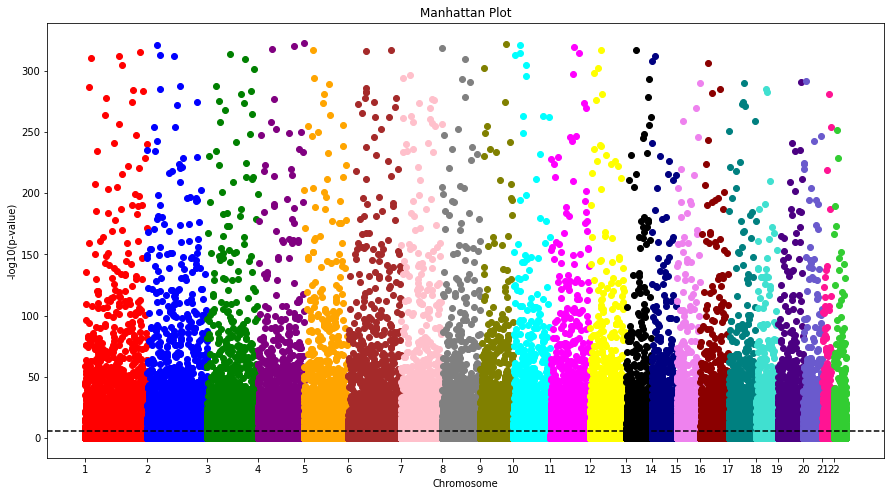

In [4]:
manhattan_plot(hwe_file=file_path, threshold=1e-6, save_fig=True, fig_name="HWE_p-vals_plot.png")

In [ ]:
# To do next:
# apply this function to the HWE p-values of the cleaned file(the file with all the deviations from HWE removed
# and check if there are still p-values below 1e-6

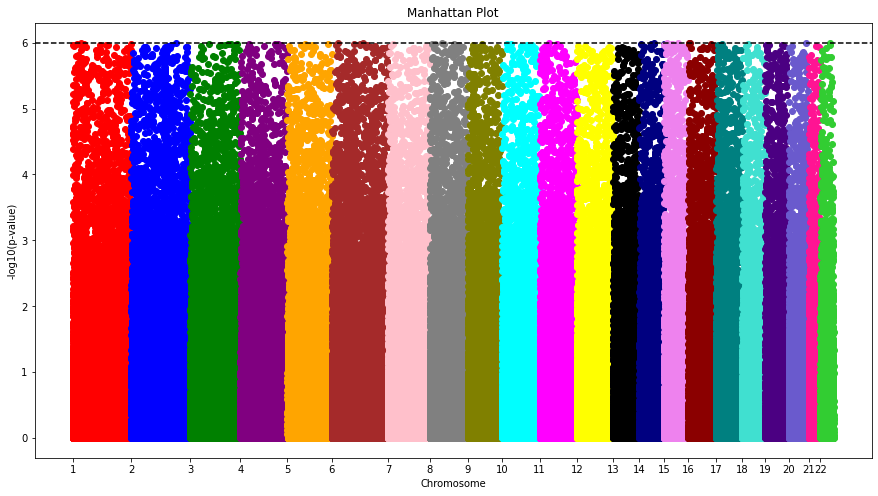

In [6]:
manhattan_plot(hwe_file="HWE_cleaned.hwe", threshold=1e-6, save_fig=True, fig_name="HWE_p-vals_plot_cleaned.png")